# **CinemaScope: Lens on Gender Shifts**

**Content of the Project**


Movies offer viewers the opportunity to share different experiences and emotions. While doing this, films generally focus on the emotions like sorrows and joys, serving as reflections of society. Despite its power and reach, it struggles with a long-standing issue of gender bias. It is believed by some people that there is gender bias in the movie industry. There are many arguments in this gender bias scope, such as stereotypical portrayal of male and female characters and underrepresentation of women.

In this project, it is aimed to perform qualitative and quantitative analysis comprehensively to explore the multifaceted dimensions of gender representation in movies.This study examines whether the representation of female in the movie industry has improved in time to better understand the extent of female under-representation and stereotyping. 

TODO: ADD SOME METHODOLOGY INFO IN

**Load the CMU movie dataset**


In this project, our main dataset is CMU movie dataset which is taken from [CMU movie dataset](https://www.cs.cmu.edu/~ark/personas/)
. All of the data taken from the website is collected under /dataset folder in the project.


In [1]:
import json
import os
import ast  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import ast  

In [2]:
#folder_path= "dataset"
folder_path=".\MovieSummaries"
character_metadata_path = os.path.join(folder_path, "character.metadata.tsv")
movie_metadata_path = os.path.join(folder_path, "movie.metadata.tsv")

tvtropes_path = os.path.join(folder_path, 'tvtropes.clusters.txt')
name_clusters_path = os.path.join(folder_path, 'name.clusters.txt')
plot_summary_path = os.path.join(folder_path, 'plot_summaries.txt')


In [3]:
character_df=pd.read_csv(character_metadata_path,sep="\t",names=[
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
])
movie_df=pd.read_csv(movie_metadata_path,sep="\t",names=["Wikipedia movie ID",
                                                                "Freebase movie ID",
                                                                "Movie name",
                                                                "Movie release date",
                                                                "Movie box office revenue",
                                                                "Movie runtime",
                                                                "Movie languages",
                                                                "Movie countries",
                                                                "Movie genres"])


# Read tvtropes.clusters.txt and create a dataframe
tvtropes_data = pd.read_csv(tvtropes_path, sep='\t', header=None)
tvtropes_data.columns = ['Character Type', 'Info']

# Read name.clusters.txt and create a dataframe
name_data = pd.read_csv(name_clusters_path, sep='\t', header=None)
name_data.columns = ['Character Name', 'ID']


# Read plot_summaries.txt and create a dataframe
summary_data = pd.read_csv(plot_summary_path, sep='\t', header=None)
summary_data.columns = ['ID', 'summary']

**Preprocessing the data**

In this section:

*  we have extracted the values in columns which are in dictionary format to seperate columns
*  proper naming for the columns
*  handling missing data

In [4]:
character_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
# we wont use Freebase character/actor map ID, Freebase character ID, Freebase actor ID, so they are dropped
character_df = character_df.drop(['Freebase character ID', 'Freebase actor ID'], axis=1)

In [6]:
character_df['Movie release year'] = character_df['Movie release date'].str[:4]

In [7]:
# convert the json parts into list of values (since we wont use the freebase ids)
def extract_values(str_list):
    return [list(ast.literal_eval(d).values()) if isinstance(d, str) else [] for d in str_list]


# Apply the function to the specific columns
movie_df['Movie languages'] = extract_values(movie_df['Movie languages'])
movie_df['Movie countries'] = extract_values(movie_df['Movie countries'])
movie_df['Movie genres'] = extract_values(movie_df['Movie genres'])


#first 4 characters from each release date - only year
movie_df['Movie release year'] = movie_df['Movie release date'].str[:4]

In [8]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


In [9]:
tvtropes_data.head()

,Character Type,Info
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [10]:
# open the values in Info section of tvtropes
tvtropes_data = pd.concat([tvtropes_data['Character Type'], tvtropes_data['Info'].apply(lambda x: pd.Series(json.loads(x)))], axis=1)
tvtropes_data.head()

,Character Type,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [11]:
name_data.head()

,Character Name,ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [12]:
summary_data.head()

,ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [13]:
# change the naming for consistency
summary_data = summary_data.rename(columns={'ID': 'Wikipedia movie ID'})

Evaluate the Missing Data

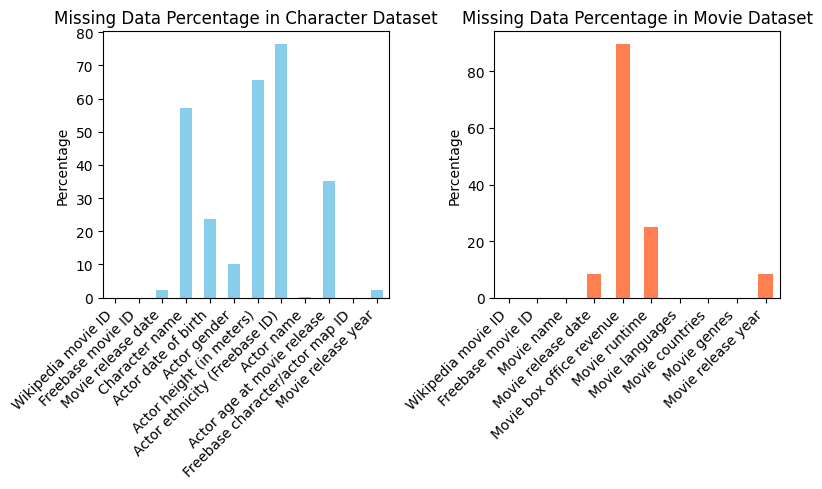

In [14]:
missing_percentage_character_df = (character_df.isnull().sum() / len(character_df)) * 100
missing_percentage_movie_df = (movie_df.isnull().sum() / len(movie_df)) * 100

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)  
missing_percentage_character_df.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage in Character Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)  
missing_percentage_movie_df.plot(kind='bar', color='coral')
plt.title('Missing Data Percentage in Movie Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()


It is clearly observed that there are lots of missing values in box office revenue. For this reason, we decided not to use that feature in our project since it can lead some wrong interpretations.

Decision for the Analysis Time Interval

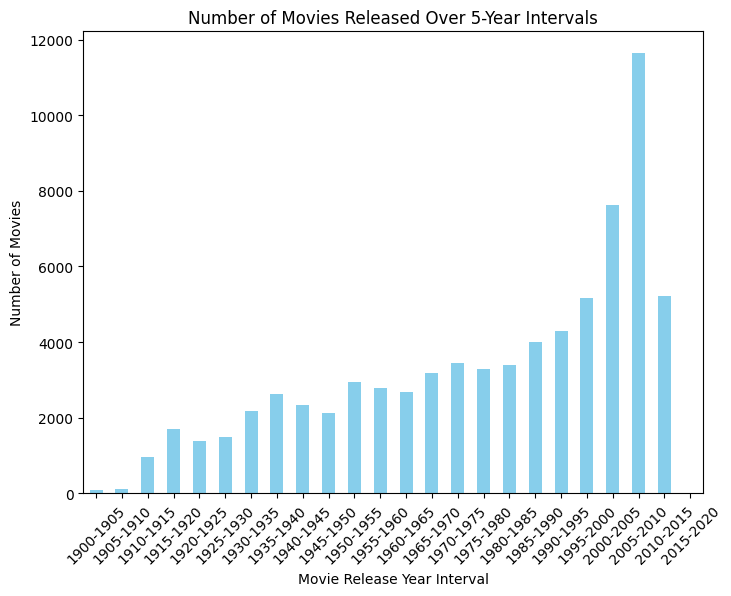

In [15]:
movie_df['Movie release year'] = pd.to_numeric(movie_df['Movie release year'], errors='coerce')
movie_df = movie_df.dropna(subset=['Movie release year'])

movie_df['Movie release year'] = movie_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = movie_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 5, 5)
year_labels = [f'{int(y)}-{int(y+5)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
movie_df['Year Interval'] = pd.cut(movie_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
movies_over_intervals = movie_df.groupby('Year Interval').size()

plt.figure(figsize=(8, 6))
movies_over_intervals.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Over 5-Year Intervals')
plt.xlabel('Movie Release Year Interval')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


It is seen that there are movies between 1900 to 2016. However, between 2010 and 2015 it is observed that there is less value in contrast to the increasing trend in time. So, we decided to use the data which we have found more reliable which is 1900 to 2010.

**Additional data generation**

We collected additional data by following the below steps:
* Dataset creation using Freebase IDs and Wikidata API to extract IMDb IDs.
* Utilization of the TMDB API for acquiring gender information of cast and crew members.

The results are stored in movie_with_gender_info.csv file.

**The analysis**
1) Cast & Crew Gender Distribution
2) Gender Diversity and Film Performance
3) Temporal Trends in Gender Representation

In [16]:
TMDB_data_path = "./additional_dataset/movie_with_gender_info.csv"
movie_with_gender_info= pd.read_csv(TMDB_data_path, index_col=0)
movie_with_gender_info.head(2)

,title,cast,crew,cast_gender,crew_gender,combined_genders,all_gender_percentages,cast_gender_percentages,crew_gender_percentages
0,Ghosts of Mars,"[{'adult': False, 'gender': 1, 'id': 57395, 'k...","[{'adult': False, 'gender': 2, 'id': 8340, 'kn...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","{1: 38.46153846153847, 2: 47.43589743589743, 0...","{1: 40.74074074074074, 2: 55.55555555555556, 0...","{2: 43.13725490196079, 0: 19.607843137254903, ..."
1,Getting Away with Murder: The JonBenét Ramsey ...,[],"[{'adult': False, 'gender': 0, 'id': 2929954, ...",[],[0],[0],{0: 100.0},{},{0: 100.0}


Additional Dataset from Kaggle

Oscar Awards: 

Analyzing Oscar awards data by gender, focusing on nominee and winner gender proportions, revealing industry gender biases and progress towards equality in film awards.

The data is taken from [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award/data?select=the_oscar_award.csv)

In [19]:
oscars_df=pd.read_csv("./additional_dataset/the_oscar_award.csv")
oscars_df.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


Handling Missing Values and Organizing Additional Dataset to Align with Main Dataset

Since the generated data is created by us it obeys the existing films in the main dataset. However, for the oscars dataset we need to match them with the CMU Movie Dataset.

In [24]:
# Eliminate rows in Oscars dataset where film names do not match with movie_df
oscars_df = oscars_df[oscars_df['film'].str.lower().isin(movie_df['Movie name'].str.lower())]
oscars_df.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


In [27]:
character_df

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Movie release year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,1992
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,1992
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,1957
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,1957


In [28]:
#handle nan values in character df
character_df= character_df.dropna(subset=['Character name', 'Actor gender', 'Actor age at movie release'])

#handle nan values in oscars
oscars_df = oscars_df.dropna(subset=['category', 'winner'])


Conducting Analysis to Address Research Questions

Our research questions are:

1) How does gender impact actors' career opportunities and success, particularly in terms of the types of roles and reward opportunities offered?
2) Is there a relation between gender and character complexity based on character relation network and plot summaries in the movies?
3) Does semantic analysis of role types reveal any distinct differences in the assignment of roles based on gender?
4) Does the gender composition of cast and crew causally influence the critical success of films, evaluated by IMDb ratings?
5) Are there specific movie genres that demonstrate a minimal or no gender gap in terms of character representation?
Does the balance of male and female characters impact a film's critical success?

We will provide the charts and analysis results along with our interpretations step by step.